# <center><font size=5> Advance Machine Learing</font></center>
<center><font size=3><i> CNN and RNN</i></font></center>  
<center><font size=3><i> Jie Guo</i></font></center>
<center><font size=3><i>4/29/2021</i></font></center>

---


In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D,Conv1D,MaxPooling1D,MaxPooling2D,RepeatVector,BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import sklearn

from tensorflow.keras.layers import RepeatVector, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D


In [2]:
from keras.models import Sequential
from keras.layers import LSTM,GRU,Dense
from keras.layers import Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

### Question 1

In [3]:
X=[]
Y=[]
SIZE=150
DAISY='C:/Users/Account/Desktop/Class/Advanced ML/Assignment 3/flowers/daisy'
SUNFLOWER='C:/Users/Account/Desktop/Class/Advanced ML/Assignment 3/flowers/sunflower'
ROSE='C:/Users/Account/Desktop/Class/Advanced ML/Assignment 3/flowers/rose'

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE,SIZE))
        
        X.append(np.array(img))
        Y.append(str(label))

In [6]:
make_train_data('0',DAISY)
print(len(X))
make_train_data('1',SUNFLOWER)
print(len(X))
make_train_data('2',ROSE)
print(len(X))

  7%|▋         | 52/734 [00:00<00:01, 513.00it/s]

769


  6%|▋         | 49/784 [00:00<00:01, 482.62it/s]

1503


100%|██████████| 784/784 [00:01<00:00, 543.94it/s]

2287


In [7]:
X=np.array(X)
Y=np.array(Y)
# le=LabelEncoder()
# Y=le.fit_transform(Y)
Y

array(['0', '0', '0', ..., '2', '2', '2'], dtype='<U1')

In [59]:
len(X)
len(Y)

2287

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [61]:
x_train=X_train.astype('float32')
x_test=X_test.astype('float32')
x_train /=255
x_test /=255
x_train.dtype
y_train=to_categorical(Y_train,3)
y_test=to_categorical(Y_test,3)

In [62]:
model=Sequential()
model.add(layers.Conv2D(filters =32,
                       kernel_size=(3,3),
                       activation ='relu',
                       input_shape =(150,150,3)))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters =64,
                       kernel_size=(3,3),
                       activation ='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters =64,
                       kernel_size=(3,3),
                       activation ='relu'))

In [63]:
model.add(layers.Flatten())

model.add(layers.Dense(units = 64, activation = 'relu'))

model.add(layers.Dense(units = 3, activation = 'softmax'))

In [64]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_34 (Flatten)         (None, 73984)             0         
_________________________________________________________________
dense_102 (Dense)            (None, 64)              

In [65]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

flower=model.fit(x_train, y_train, batch_size = 64, epochs = 50,validation_split = 1/6,
          callbacks = [EarlyStopping(monitor = 'loss',patience = 0)])

Epoch 1/50
21/21 [==============================] - 12s 571ms/step - loss: 4.3736 - accuracy: 0.3663 - val_loss: 0.8172 - val_accuracy: 0.6816
Epoch 2/50
21/21 [==============================] - 14s 675ms/step - loss: 0.7694 - accuracy: 0.6881 - val_loss: 0.6429 - val_accuracy: 0.7491
Epoch 3/50
21/21 [==============================] - 14s 675ms/step - loss: 0.7133 - accuracy: 0.7153 - val_loss: 0.6232 - val_accuracy: 0.7416
Epoch 4/50
21/21 [==============================] - 14s 661ms/step - loss: 0.6192 - accuracy: 0.7455 - val_loss: 0.8252 - val_accuracy: 0.6330
Epoch 5/50
21/21 [==============================] - 14s 660ms/step - loss: 0.4958 - accuracy: 0.7829 - val_loss: 0.5521 - val_accuracy: 0.7828
Epoch 6/50
21/21 [==============================] - 14s 659ms/step - loss: 0.4478 - accuracy: 0.8311 - val_loss: 0.6122 - val_accuracy: 0.7678
Epoch 7/50
21/21 [==============================] - 14s 662ms/step - loss: 0.3106 - accuracy: 0.8735 - val_loss: 0.5728 - val_accuracy: 0.8165

#### 1. Plot the loss and accuracy curves for training and validation sets.

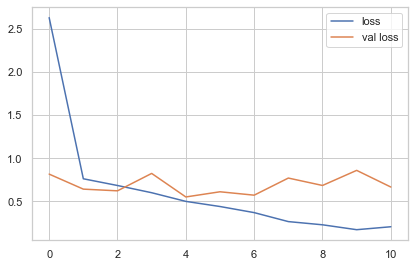

In [69]:
plt.plot(flower.history['loss'],label = 'loss')
plt.plot(flower.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

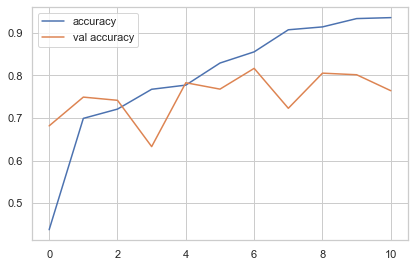

In [70]:
plt.plot(flower.history['accuracy'],label = 'accuracy')
plt.plot(flower.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()

In [ ]:
1.2 

#### 1.3 Report the model accuracy on the test set. Include the confusion matrix.

In [68]:
test_loss, test_acc= model.evaluate(x_test,y_test)

print('Model performance on the test set is as follows: test loss =',
      round(test_loss,2)," and the best accuracy =", round(test_acc,2))

22/22 [==============================] - 2s 87ms/step - loss: 0.7039 - accuracy: 0.7482
Model performance on the test set is as follows: test loss = 0.7  and the best accuracy = 0.75


In [71]:
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

In [72]:
Y_test=Y_test.astype('float32')

In [73]:
confusion_matrix(Y_test, y_pred)

array([[171,  22,  29],
       [ 34, 180,  16],
       [ 55,  17, 163]], dtype=int64)

### Question 2.1 Create a recurrent neural network model. Explore both gru and lstm layers.

In [20]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import LSTM,GRU,Dense
from keras.layers import Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler

#### Create Sequence

In [21]:
def createSeq(dataset, look_back, foresight):
    X, Y = [], []
    for i in range(len(dataset) - look_back - foresight):
        obs = dataset[i:(i + look_back),0]#Sequence of "look_back", in this case 7 stock prices
        X.append(obs)                     #Append stock price value occuring "foresight+1", in this case 4 time-steps into future
        Y.append(dataset[i + (look_back + foresight),0])
    
    return np.array(X),np.array(Y)

####  Calculate MAE of LSTM, and GRU

#### Creat a function for LSTM

In [22]:
def lstm(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model = Sequential()
    model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model.summary()
    
    
    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)
#     MAE=sum(error) / len(error)
#     MAE
    MAE = model.evaluate(testNormX, testNormY)
    return MAE[1]
    


#### Creat a function for GRU

In [23]:
def gru(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model2 = Sequential()
    model2.add(GRU(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model2.add(Dense(1,activation = 'linear'))
    model2.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model2.summary()
    
    
    
    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network2 = model2.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model2.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)


#     MAE=sum(error) / len(error)
#     MAE
    MAE = model2.evaluate(testNormX, testNormY)
    return MAE[1]
    

In [26]:
mae_lstm=0
# mae_gru=0
for i in range(5):
    
    mae_lstm += (lstm(4,i))
#     mae_gru += (gru(4,i))
ave_MAE_lstm=mae_lstm/5
print(ave_MAE_lstm)

1/1 [==============================] - 0s 10ms/step - loss: 0.1492 - mean_absolute_error: 0.1492
0.1018537275493145


In [27]:
mae_gru=0
for i in range(5):
    
    
    mae_gru += (gru(4,i))
ave_MAE_gru=mae_gru/5
print(ave_MAE_gru)

1/1 [==============================] - 0s 10ms/step - loss: 0.1537 - mean_absolute_error: 0.1537
0.09616431519389153


In [28]:
def getResult(LSTM,GRU):

    if LSTM > GRU:
        return 'GRU model is better, and which MAE is ',GRU
    else:
        return  'GRU model is better, and which MAE is ',LSTM

In [29]:
getResult(ave_MAE_lstm,ave_MAE_gru)

('GRU model is better, and which MAE is ', 0.09616431519389153)

#### 2.1  Plot the loss curves for training and validation sets.

#### Creat a function for plotting LSTM

In [30]:
def lstm_plot(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model = Sequential()
    model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model.add(Dense(1,activation = 'linear'))
    model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model.summary()
    
    
    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network = model.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)
#     MAE=sum(error) / len(error)
#     MAE
    plt.plot(network.history['loss'],label = 'loss')
    plt.plot(network.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
#     return plt.show()
    


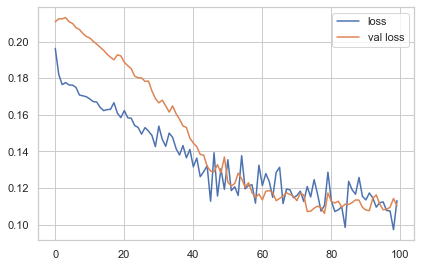

In [31]:
lstm_plot(4,1)

week 1


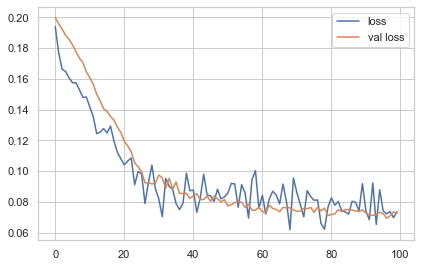

week 2


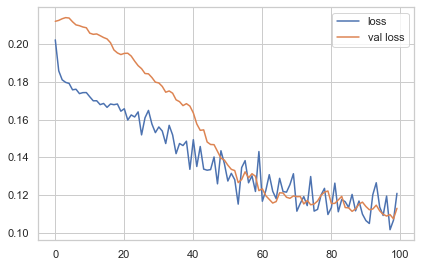

week 3


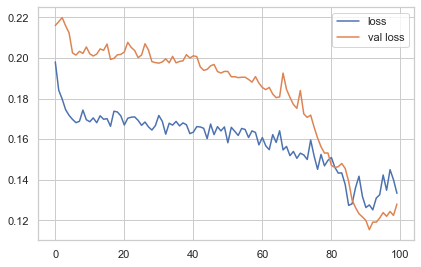

week 4


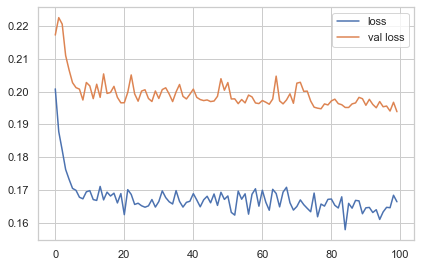

week 5


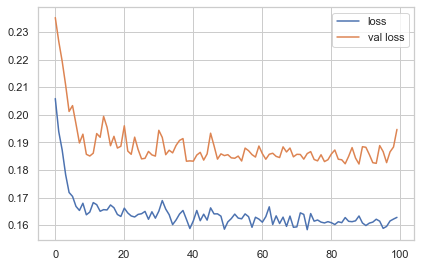

In [32]:
for i in range(5):
    
    print('week',i+1)
    lstm_plot(4,i)

#### Creat a function for plotting GRU

In [33]:
def gru_plot(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model2 = Sequential()
    model2.add(GRU(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
    model2.add(Dense(1,activation = 'linear'))
    model2.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model2.summary()
    
    
    
    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network2 = model2.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model2.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)


#     MAE=sum(error) / len(error)
#     MAE
    plt.plot(network2.history['loss'],label = 'loss')
    plt.plot(network2.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
    return plt.show()
#     MAE = model.evaluate(testNormX, testNormY)
#     return MAE[1]
    

week 1


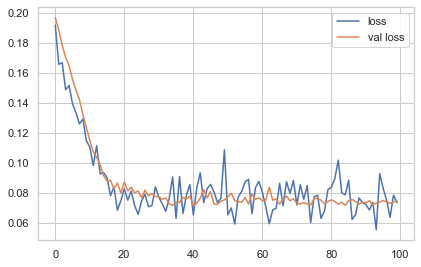

week 2


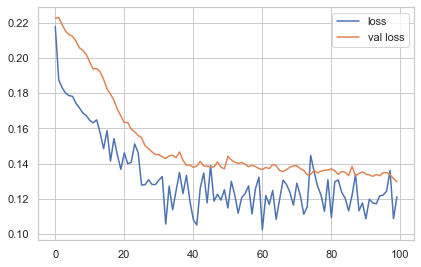

week 3


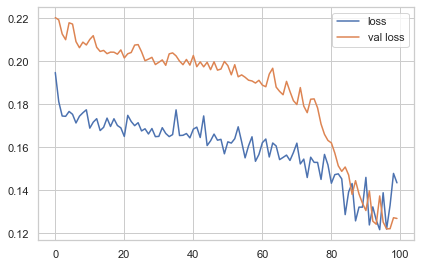

week 4


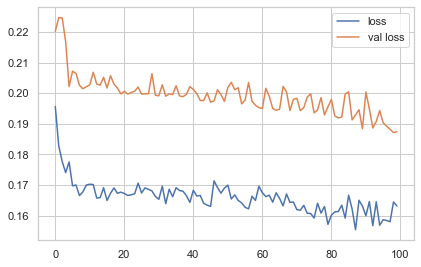

week 5


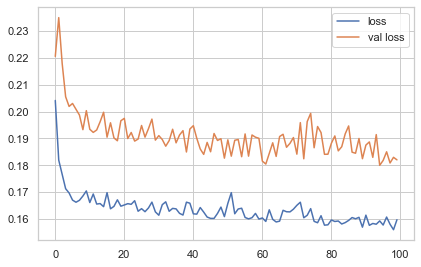

In [34]:
for i in range(5):
    
    print('week',i+1)
    gru_plot(4,i)

### Question 2.2 Conv1D

#### Create a 1d convolutional network model. Explore if stacking lstm or gru layers helps with the performance.

In [36]:
def Conv_1D(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
#     model = Sequential()
#     model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=(6, 1)))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Flatten())
#     model.add(Dense(units = 64, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mae',metrics=["mae"])

    
    
    modelconv_1D = Sequential()
    modelconv_1D.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    modelconv_1D.add(MaxPooling1D(pool_size=2))
    modelconv_1D.add(Conv1D(64,kernel_size=1, activation='relu'))
    modelconv_1D.add(MaxPooling1D(pool_size=1))
#     model3.add(Conv1D(64,kernel_size=4, activation='relu'))
#     model3.add(MaxPooling1D(pool_size=1))
    modelconv_1D.add(layers.Flatten())

    modelconv_1D.add(layers.Dense(units = 64, activation = 'relu'))

    modelconv_1D.add(Dense(1))
#     model3.add(Flatten())
#     model3.add(RepeatVector(3))

#     model3.add(LSTM(32,activation='relu'))
#     modelconv_1D.add(Flatten())
#     modelconv_1D.add(Dense(units = 64, activation='relu'))

#     modelconv_1D.add(Dense(1))

#     modelconv_1D.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
#     model = Sequential()
#     model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
#     model.add(Dense(1,activation = 'linear'))
    modelconv_1D.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model.summary()
    
    
    
#     network_name = 'lstm'
#     filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
#     checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    checkpoint=EarlyStopping(monitor = 'loss', verbose=0,mode='min',patience =10,restore_best_weights=True)
    callbacks_list = [checkpoint]
    networkconv_1D = modelconv_1D.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
#     network_conv_1D = model.fit(trainNormX, trainNormY,
#                  batch_size=64, epochs=100,verbose=0,
#                  validation_data=(valNormX,valNormY),callbacks = callbacks_list)

    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)
#     MAE=sum(error) / len(error)
#     MAE
    MAE = modelconv_1D.evaluate(testNormX, testNormY)
    return MAE[1]

In [38]:
def lstm_Conv1D(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    model3 = Sequential()
    model3.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    model3.add(MaxPooling1D(pool_size=2))
    model3.add(Conv1D(64,kernel_size=1, activation='relu'))
    model3.add(MaxPooling1D(pool_size=1))
    # model3.add(Conv1D(64,kernel_size=4, activation='relu'))
    # model3.add(MaxPooling1D(pool_size=1))

    model3.add(Flatten())
    model3.add(RepeatVector(3))

    model3.add(LSTM(32,activation='relu'))
#     model3.add(Flatten())
    model3.add(Dense(1))

    model3.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
#     model = Sequential()
#     model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
#     model.add(Dense(1,activation = 'linear'))
#     model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model.summary()
    
    
    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network3 = model3.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)
#     MAE=sum(error) / len(error)
#     MAE
    MAE = model3.evaluate(testNormX, testNormY)
    return MAE[1]
    


In [39]:
def gru_Conv1D(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model4 = Sequential()
    model4.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    model4.add(MaxPooling1D(pool_size=2))
    model4.add(Conv1D(64,kernel_size=1, activation='relu'))
    model4.add(MaxPooling1D(pool_size=1))
    # model3.add(Conv1D(64,kernel_size=4, activation='relu'))
    # model3.add(MaxPooling1D(pool_size=1))

    model4.add(Flatten())
    model4.add(RepeatVector(3))

    model4.add(GRU(32,activation='relu'))
#     model4.add(Flatten())
    model4.add(Dense(1))

    model4.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

#     model3.summary()
#     network3 = model3.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),epochs=100,batch_size=64)
#     #     model2.summary()

    
    
    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network4 = model4.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model2.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)


#     MAE=sum(error) / len(error)
#     MAE
    MAE = model4.evaluate(testNormX, testNormY)
    return MAE[1]

In [40]:
lstm_Conv1D(4,1)

1/1 [==============================] - 0s 9ms/step - loss: 0.0716 - mean_absolute_error: 0.0716


0.0716199278831482

In [41]:
gru_Conv1D(4,1)

1/1 [==============================] - 0s 10ms/step - loss: 0.0947 - mean_absolute_error: 0.0947


0.0946677103638649

#### Compare  Report the MAE of the test set on your best model.

In [42]:
mae_c1d=0
# mae_gru=0
for i in range(5):
    
    mae_c1d += (Conv_1D(4,i))
#     mae_gru += (gru(4,i))
ave_MAE_c1d=mae_c1d/5
print(ave_MAE_c1d)

1/1 [==============================] - 0s 9ms/step - loss: 0.1939 - mean_absolute_error: 0.1939
0.10558642596006393


In [43]:
mae_lstm_c1d=0
# mae_gru=0
for i in range(5):
    
    mae_lstm_c1d += (lstm_Conv1D(4,i))
#     mae_gru += (gru(4,i))
ave_MAE_lstm_c1d=mae_lstm_c1d/5
print(ave_MAE_lstm_c1d)

1/1 [==============================] - 0s 9ms/step - loss: 0.1719 - mean_absolute_error: 0.1719
0.10272393524646758


In [44]:
mae_gru_c1d=0
# mae_gru=0
for i in range(5):
    
    mae_gru_c1d += (gru_Conv1D(4,i))
#     mae_gru += (gru(4,i))
ave_MAE_gru_c1d=mae_gru_c1d/5
print(ave_MAE_gru_c1d)

1/1 [==============================] - 0s 9ms/step - loss: 0.2056 - mean_absolute_error: 0.2056
0.1107185035943985


In [45]:
def max_min(a, b, c):
    if a>b:
        if b>c:
            return 'a>b>c'
        else:
            if a>c:
                return 'a>c>b'
            else:
                return 'c>a>b'
    elif a<b:
        if b<c:
            return 'c>b>a'
        else:
            if c>a:
                return 'b>c>a'
            else:
                return 'b>a>c'

In [46]:
max_min(ave_MAE_c1d, ave_MAE_lstm_c1d, ave_MAE_gru_c1d)

'c>a>b'

#### So we can see the model of convolutional network and stacking LSTM is the best.

#### 2.2 loss and VAL_loss plot

In [47]:
def Conv_1D_plot(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    modelconv_1D = Sequential()
    modelconv_1D.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    modelconv_1D.add(MaxPooling1D(pool_size=2))
    modelconv_1D.add(Conv1D(64,kernel_size=1, activation='relu'))
    modelconv_1D.add(MaxPooling1D(pool_size=1))

    modelconv_1D.add(layers.Flatten())

    modelconv_1D.add(layers.Dense(units = 64, activation = 'relu'))

    modelconv_1D.add(Dense(1))
    
    modelconv_1D.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])

    checkpoint=EarlyStopping(monitor = 'loss', verbose=0,mode='min',patience =10,restore_best_weights=True)
    callbacks_list = [checkpoint]
    networkconv_1D = modelconv_1D.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    

    plt.plot(networkconv_1D.history['loss'],label = 'loss')
    plt.plot(networkconv_1D.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
    return plt.show()

In [48]:
def lstm_Conv1D_plot(look_back,foresight):

    
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    model3 = Sequential()
    model3.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    model3.add(MaxPooling1D(pool_size=2))
    model3.add(Conv1D(64,kernel_size=1, activation='relu'))
    model3.add(MaxPooling1D(pool_size=1))
    # model3.add(Conv1D(64,kernel_size=4, activation='relu'))
    # model3.add(MaxPooling1D(pool_size=1))

    model3.add(Flatten())
    model3.add(RepeatVector(3))

    model3.add(LSTM(32,activation='relu'))
    model3.add(Dense(1))

    model3.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
#     model = Sequential()
#     model.add(LSTM(32, input_shape = (look_back,1), dropout = 0.1, recurrent_dropout = 0.1))
#     model.add(Dense(1,activation = 'linear'))
#     model.compile(loss = 'mae',optimizer = 'adam', metrics = ['mean_absolute_error'])
#     model.summary()
    
    
    
    network_name = 'lstm'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network3 = model3.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)
#     MAE=sum(error) / len(error)
#     MAE
    plt.plot(network3.history['loss'],label = 'loss')
    plt.plot(network3.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
    return plt.show()
    


In [49]:
def gru_Conv1D_plot(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1],1))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1],1))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1],1))
    
    
    
    model4 = Sequential()
    model4.add(Conv1D(64,kernel_size=3, activation='relu',input_shape=(look_back,1)))
    model4.add(MaxPooling1D(pool_size=2))
    model4.add(Conv1D(64,kernel_size=1, activation='relu'))
    model4.add(MaxPooling1D(pool_size=1))
    # model3.add(Conv1D(64,kernel_size=4, activation='relu'))
    # model3.add(MaxPooling1D(pool_size=1))

    model4.add(Flatten())
    model4.add(RepeatVector(3))

    model4.add(GRU(32,activation='relu'))
    model4.add(Dense(1))

    model4.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

#     model3.summary()
#     network3 = model3.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),epochs=100,batch_size=64)
#     #     model2.summary()

    
    
    network_name = 'gru'
    filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
    callbacks_list = [checkpoint]
    network4 = model4.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model2.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)


#     MAE=sum(error) / len(error)
#     MAE
    plt.plot(network4.history['loss'],label = 'loss')
    plt.plot(network4.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
    return plt.show()

week 1


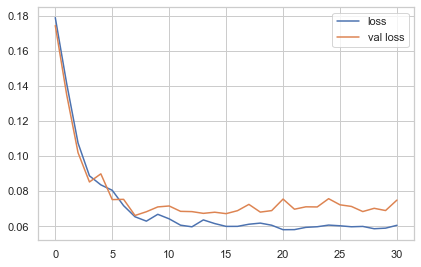

week 2


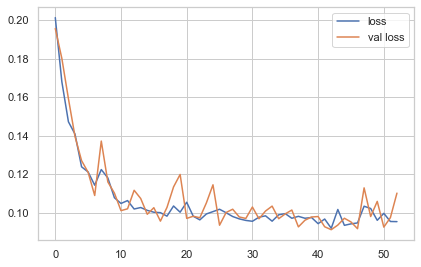

week 3


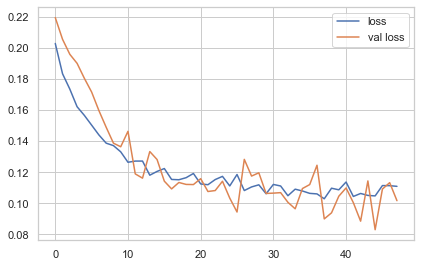

week 4


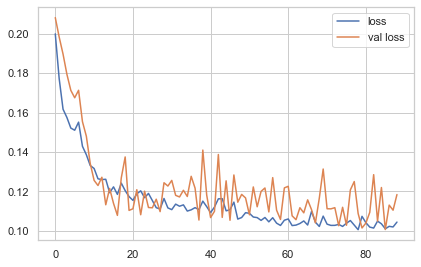

week 5


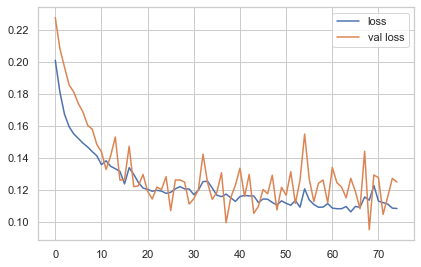

In [50]:
for i in range(5):
    
    print('week',i+1)
    Conv_1D_plot(4,i)

week 1


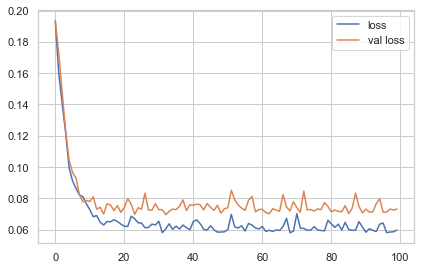

week 2


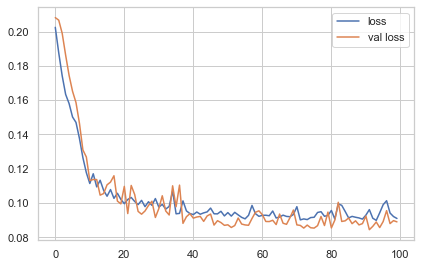

week 3


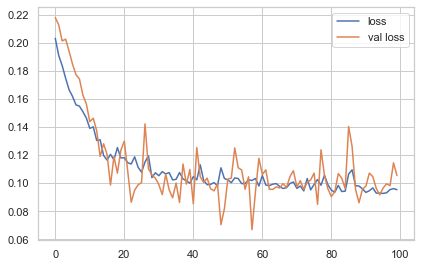

week 4


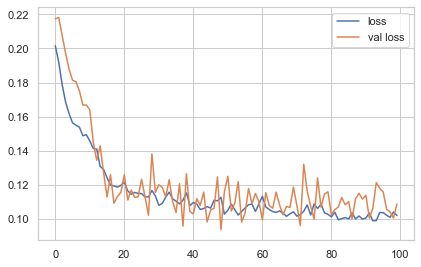

week 5


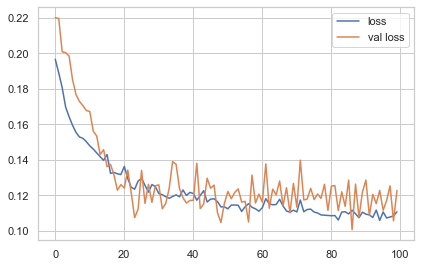

In [51]:
for i in range(5):
    
    print('week',i+1)
    lstm_Conv1D_plot(4,i)

week 1


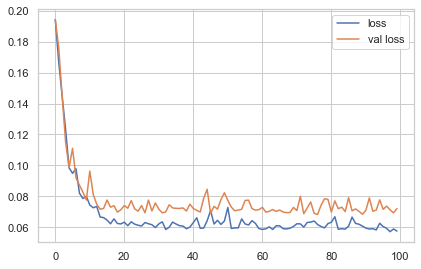

week 2


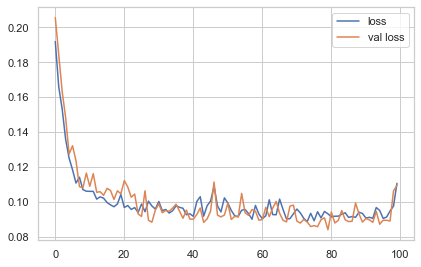

week 3


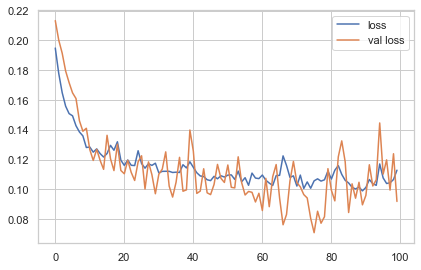

week 4


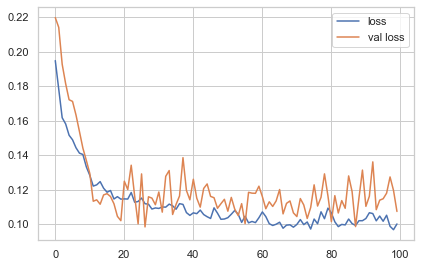

week 5


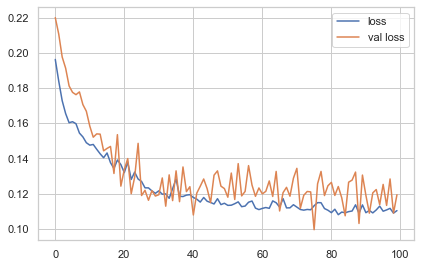

In [52]:
for i in range(5):
    
    print('week',i+1)
    gru_Conv1D_plot(4,i)

### Question 2.3 Regular Deep NN

In [53]:
def DNN(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1]))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1]))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1]))
    
    
    
    modeldnn=Sequential()
    modeldnn.add(Dense(64,activation='relu',input_shape=(look_back,)))
    modeldnn.add(Dropout(0.2))
    modeldnn.add(Dense(64,activation='relu'))
    modeldnn.add(Dropout(0.2))
    modeldnn.add(Dense(1,activation='linear'))

    modeldnn.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

#     model3.summary()
#     network3 = model3.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),epochs=100,batch_size=64)
#     #     model2.summary()

    
    checkpoint=EarlyStopping(monitor = 'loss', verbose=0,mode='min',patience =10,restore_best_weights=True)
    callbacks_list = [checkpoint]
    networkdnn= modeldnn.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)

    MAE = modeldnn.evaluate(testNormX, testNormY)
    return MAE[1]

In [54]:
DNN(4,1)

1/1 [==============================] - 0s 9ms/step - loss: 0.0619 - mean_absolute_error: 0.0619


0.06191351264715195

In [55]:
mae_dnn=0
# mae_gru=0
for i in range(5):
    
    mae_dnn += (DNN(4,i))
#     mae_gru += (gru(4,i))
ave_MAE_dnn=mae_dnn/5
print(ave_MAE_dnn)

1/1 [==============================] - 0s 10ms/step - loss: 0.1659 - mean_absolute_error: 0.1659
0.1047246977686882


### 2.3 DNN_plot

In [56]:
def DNN_plot(look_back,foresight):
 
    
    df = pd.read_csv('admData20.csv')
    adm = df['AdmittedNum'].values
    
    
    trainPortion = round(adm.shape[0]*0.7)
    valPortion = round(adm.shape[0]*0.15)
    trainData = adm[:trainPortion]
    valData = adm[trainPortion: trainPortion + valPortion]
    testData = adm[trainPortion + valPortion:]
    
    
    
    sc = MinMaxScaler(feature_range=(0,1))
#     print(trainData.shape)
    trainData = trainData.reshape(-1,1)
#     print(trainData.shape)
    valData = valData.reshape(-1,1)
    testData = testData.reshape(-1,1)
    
    sc.fit(trainData)
    trainNorm = sc.transform(trainData)
    valNorm =sc.transform(valData)
    testNorm = sc.transform(testData)
    
    trainNormX, trainNormY = createSeq(trainNorm, look_back = look_back, foresight = foresight)
    valNormX, valNormY = createSeq(valNorm, look_back = look_back, foresight = foresight)
    testNormX, testNormY = createSeq(testNorm, look_back = look_back, foresight = foresight)
    
    trainNormX = np.reshape(trainNormX, (trainNormX.shape[0],trainNormX.shape[1]))
    valNormX = np.reshape(valNormX, (valNormX.shape[0],valNormX.shape[1]))
    testNormX = np.reshape(testNormX, (testNormX.shape[0],testNormX.shape[1]))
    
    
    
    modeldnn=Sequential()
    modeldnn.add(Dense(64,activation='relu',input_shape=(look_back,)))
    modeldnn.add(Dropout(0.2))
    modeldnn.add(Dense(64,activation='relu'))
    modeldnn.add(Dropout(0.2))
    modeldnn.add(Dense(1,activation='linear'))

    modeldnn.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])

#     model3.summary()
#     network3 = model3.fit(trainNormX,trainNormY,validation_data=(valNormX,valNormY),epochs=100,batch_size=64)
#     #     model2.summary()

    
    checkpoint=EarlyStopping(monitor = 'loss', verbose=0,mode='min',patience =10,restore_best_weights=True)
    callbacks_list = [checkpoint]
    networkdnn= modeldnn.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
                        batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
#     network_name = 'gru'
#     filepath = network_name + "_epoch -{epoch:02d}-loss-{loss:.4f}-.hdf5"
#     checkpoint = ModelCheckpoint(filepath, monitor = 'loss',verbse = 0, save_best_only = True, mode='min')
#     callbacks_list = [checkpoint]
#     network4 = model4.fit(trainNormX, trainNormY, validation_data = (valNormX, valNormY),epochs = 100, 
#                         batch_size = 8, callbacks = callbacks_list,verbose = 0)
    
    
    
#     plt.plot(network.history['loss'],label = 'loss')
#     plt.plot(network.history['val_loss'],label = 'val loss')
#     plt.legend()
#     plt.show()
    
#     preds = model2.predict(testNormX)
#     preds = preds.reshape(-1,1)
#     testNormY = testNormY.reshape(-1,1)
#     error=abs(preds - testNormY)


#     MAE=sum(error) / len(error)
#     MAE
    plt.plot(networkdnn.history['loss'],label = 'loss')
    plt.plot(networkdnn.history['val_loss'],label = 'val loss')
    plt.legend()
    plt.show()
    return plt.show()

week 1


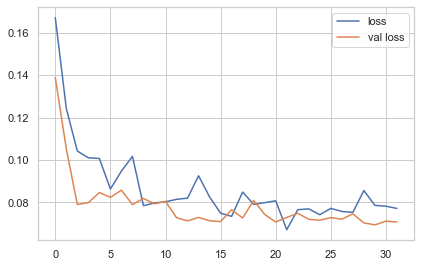

week 2


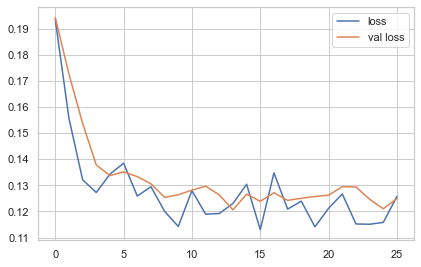

week 3


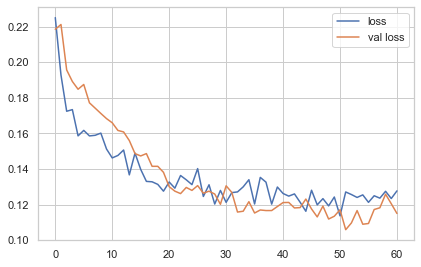

week 4


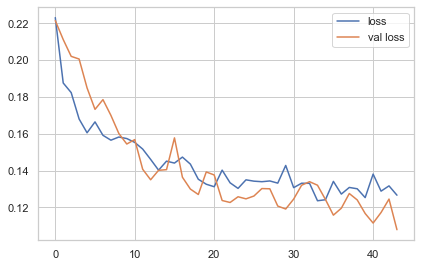

week 5


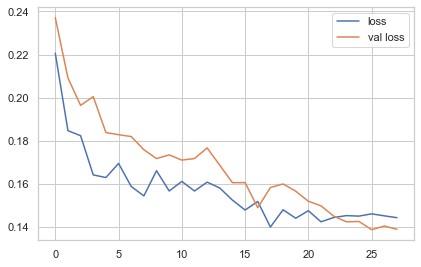

In [57]:
for i in range(5):
    
    print('week',i+1)
    DNN_plot(4,i)

### Question 2.4, Comment on the performance of the your models.

#### if we only use LSTM and GRU to creat model, the MAE of GRU is lower than LSTM. However, when we use our model to fit week4 and week5, the loss become large, which means our prediction is going to be inaccurate.


#### After  convolutional network and stacking gru and lstm, we get the lower MAE on CONV1D of LSTM. Additionally, the plots of  loss and val_loss are perform better than only LSTM, or only GRU, because the two lines are getting closer and closer, and they keep intersecting from week 1 to week 5, that means the fitting is great.

#### After trying 6 models, including LSTM,GRU,CONV1D,CONV1D of LSTM,CONV1D of GRU,and DNN, we can know the best model is CONV1D of LSTM is the best